In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [29]:
df = pd.read_csv("co2.csv")

In [30]:
df.head()

,time,co2
0,1958-03-29,316.1
1,1958-04-05,317.3
2,1958-04-12,317.6
3,1958-04-19,317.5
4,1958-04-26,316.4


In [31]:
df['time'] = pd.to_datetime(df['time'])


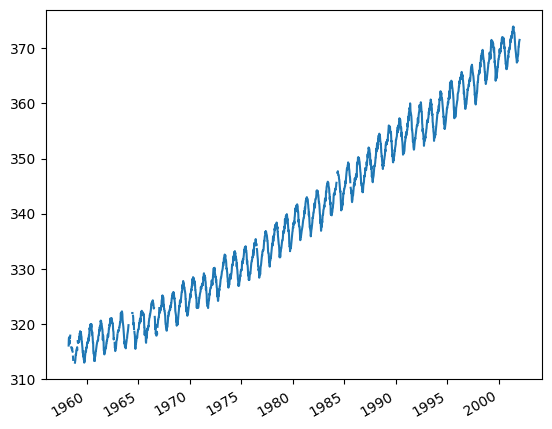

In [32]:
plt.plot(df.time, df.co2)
plt.xticks(rotation =30, ha = "right")
plt.show()

In [33]:
df['co2'].interpolate(inplace= True)

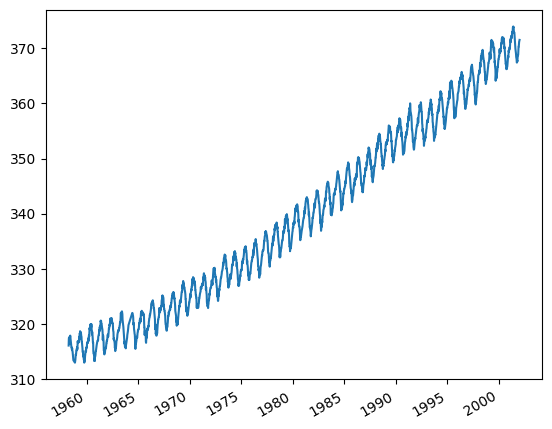

In [34]:
plt.plot(df.time, df.co2)
plt.xticks(rotation =30, ha = "right")
plt.show()

In [35]:
window_size = 5
target_size = 3


In [36]:
def create_data(data, window_size, target_size):
    i = 1
    while i < window_size:
        data['co2_{}'.format(i)] = data["co2"].shift(-i)
        i += 1

    i = 0
    while  i < target_size:
        data['target_{}'.format(i)] = data['co2'].shift(-i-window_size)
        i +=1
    data = data.dropna(axis = 0)
    return data


In [37]:
data = create_data(df, window_size, target_size)

In [38]:
data.head()

,time,co2,co2_1,co2_2,co2_3,co2_4,target_0,target_1,target_2
0,1958-03-29,316.1,317.3,317.6,317.5,316.4,316.90,317.20,317.50
1,1958-04-05,317.3,317.6,317.5,316.4,316.9,317.20,317.50,317.90
2,1958-04-12,317.6,317.5,316.4,316.9,317.2,317.50,317.90,317.55
3,1958-04-19,317.5,316.4,316.9,317.2,317.5,317.90,317.55,317.20
4,1958-04-26,316.4,316.9,317.2,317.5,317.9,317.55,317.20,316.85


In [39]:
targets = ["target_{}".format(i) for i in range(target_size)]
x = data.drop(['time'] +targets , axis = 1)
y = data[targets]

In [40]:
x_train = x[: int(len(x)*0.8)]
y_train  =y[: int(len(y)*0.8)]

x_test = x[int(len(x)*0.8) :]
y_test  =y[int(len(y)*0.8) : ]


In [41]:
regs = [LinearRegression() for _ in range(target_size)]
for i, reg in  enumerate(regs):
    reg.fit(x_train, y_train["target_{}".format(i)])
    

In [42]:
r2 = []
mse = []
mae = []

In [43]:
for i, reg in enumerate(regs):
    y_pred = reg.predict(x_test)
    r2.append(r2_score(y_test["target_{}".format(i)], y_pred))
    mse.append(mean_squared_error(y_test["target_{}".format(i)], y_pred))
    mae.append(mean_absolute_error(y_test["target_{}".format(i)], y_pred))

In [44]:
r2 

[0.990694183549828, 0.9823771406805397, 0.972827321439104]

In [45]:
mse

[0.22101469765793338, 0.41917947971121394, 0.6476309152612948]

In [27]:
mae

[0.3618741479836235, 0.5058913973664203, 0.6465162623791821]